In [ ]:
# Question 1 

In [26]:
import pandas as pd 
import seaborn as sns
import numpy as np

In [27]:
data = pd.read_csv("/content/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [29]:
data =data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


**EDA and Data Visualization**

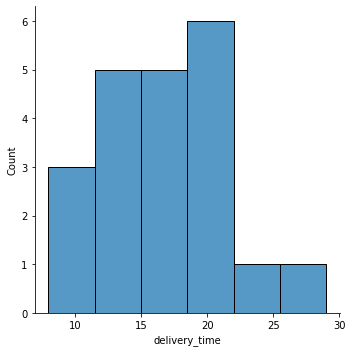

In [30]:
sns.displot(data["delivery_time"])

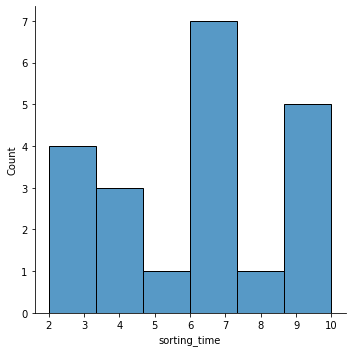

In [31]:
sns.displot(data["sorting_time"])

In [ ]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


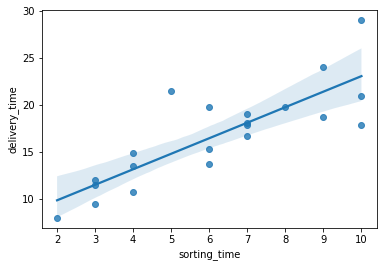

In [ ]:
sns.regplot(x=data['sorting_time'], y=data['delivery_time'])


***Transformations ***

In [ ]:
data = pd.read_csv("/content/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
# Log transformation 
data_log = np.log(data)
data_log

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


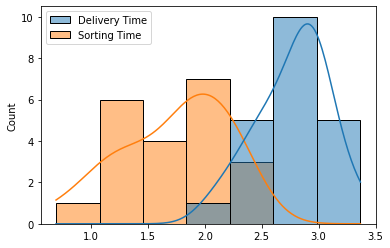

In [ ]:
sns.histplot(data= data_log , kde = True)

In [ ]:
# Sqrt transformation 
data_sqrt = np.sqrt(data)
data_sqrt

,Delivery Time,Sorting Time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


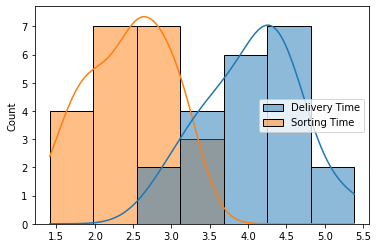

In [ ]:
sns.histplot(data = data_sqrt , kde = True)

In [ ]:
# Cube root transformation 
data_cbrt = np.cbrt (data)
data_cbrt 

,Delivery Time,Sorting Time
0,2.758924,2.154435
1,2.381102,1.587401
2,2.703060,1.817121
3,2.884499,2.080084
4,3.072317,2.154435
5,2.485246,1.817121
6,2.668402,1.912931
7,2.117912,1.442250
8,2.615879,2.154435
9,2.656646,2.080084


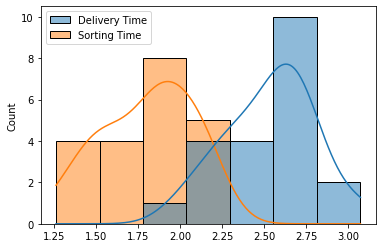

In [ ]:
sns.histplot(data= data_cbrt , kde = True)

In [ ]:
# Reciprocal Transformation
data_reciprocal = np.reciprocal (data)
data_reciprocal 

,Delivery Time,Sorting Time
0,0.047619,0
1,0.074074,0
2,0.050633,0
3,0.041667,0
4,0.034483,0
5,0.065147,0
6,0.052632,0
7,0.105263,0
8,0.055866,0
9,0.053333,0


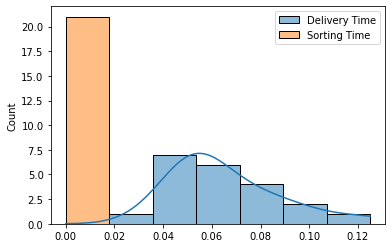

In [ ]:
sns.histplot(data= data_reciprocal , kde = True)

**Model Building**

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()

***Model Testing ***

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
model.rsquared

0.6822714748417231

In [ ]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834


*** Model Prediction ***

In [ ]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [ ]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [ ]:
# Question 2 

In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import statsmodels.formula.api as smf 

In [ ]:
data = pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**EDA and Data Visualization ***

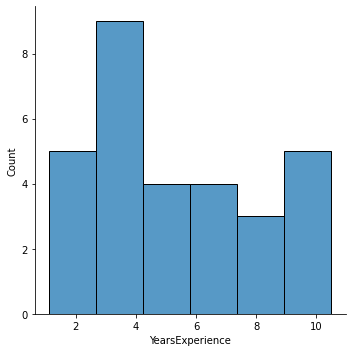

In [ ]:
sns.displot(data["YearsExperience"])

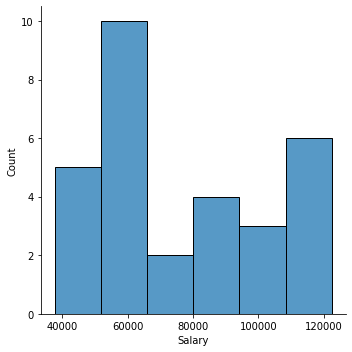

In [ ]:
sns.displot(data["Salary"])

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


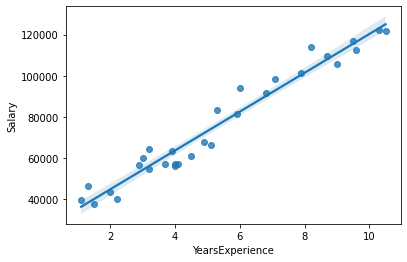

In [ ]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

**Transformations ***

In [ ]:
data = pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# Log transformation 
data_log = np.log(data)
data_log

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


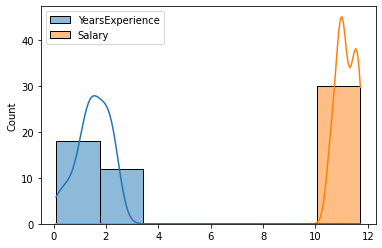

In [ ]:
sns.histplot(data= data_log , kde = True)

In [ ]:
# Sqrt transformation
data_sqrt = np.sqrt(data)
data_sqrt

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691
3,1.414214,208.626460
4,1.483240,199.727314
5,1.702939,237.995798
6,1.732051,245.254969
7,1.788854,233.334524
8,1.788854,253.860198
9,1.923538,239.142217


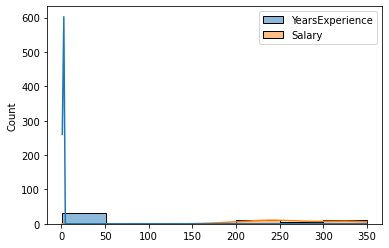

In [ ]:
sns.histplot(data= data_sqrt , kde = True)

In [ ]:
# Cube root transformation
data_cbrt = np.cbrt(data)
data_cbrt

,YearsExperience,Salary
0,1.032280,34.011242
1,1.091393,35.883626
2,1.144714,33.540235
3,1.259921,35.175984
4,1.300591,34.168426
5,1.426043,38.404271
6,1.442250,39.181273
7,1.473613,37.901174
8,1.473613,40.092494
9,1.546680,38.527500


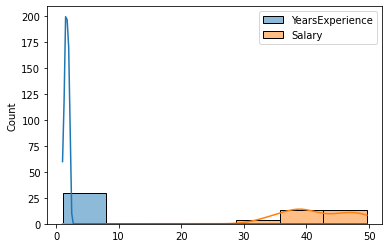

In [ ]:
sns.histplot(data= data_cbrt , kde = True)

In [ ]:
#reciprocal transformation 
data_reciprocal = np.reciprocal(data)
data_reciprocal 

,YearsExperience,Salary
0,0.909091,0.000025
1,0.769231,0.000022
2,0.666667,0.000027
3,0.500000,0.000023
4,0.454545,0.000025
5,0.344828,0.000018
6,0.333333,0.000017
7,0.312500,0.000018
8,0.312500,0.000016
9,0.270270,0.000017


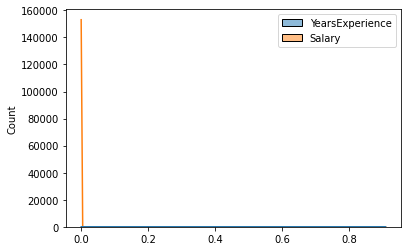

In [ ]:
sns.histplot(data= data_reciprocal , kde = True)

**Model Building ***

In [ ]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

**Model Testing ***

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
model.rsquared

0.9569566641435086

**Model Prediction ***

In [ ]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [ ]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [ ]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [ ]:
# In class excerise 

In [ ]:
import pandas as pd
import seaborn as sas
import statsmodels.formula.api as smf 

In [ ]:
data = pd.read_csv("/content/WC_AT.csv")
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


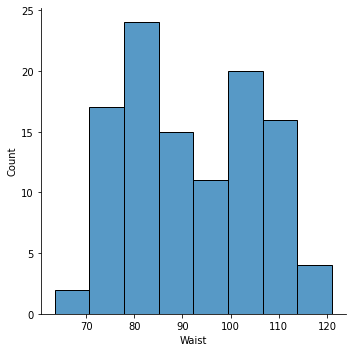

In [ ]:
sns.displot(data["Waist"])

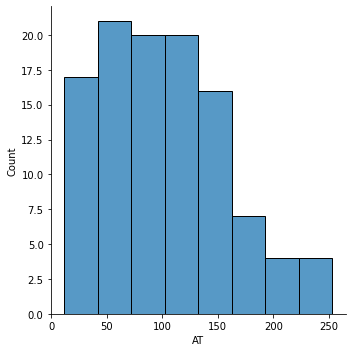

In [ ]:
sns.displot(data["AT"])

In [ ]:
# to avoid negative in the resulting values , we should give data in range for eg in this eqtn the range is from 63 minimum to 121 maximum 
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [ ]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


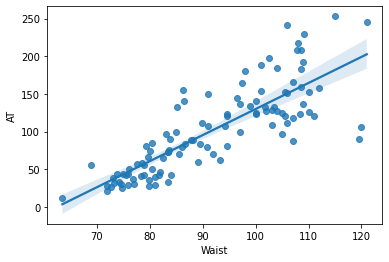

In [ ]:
sns.regplot(x= "Waist", y= "AT", data = data)

In [ ]:
model = smf.ols("AT~Waist", data = data).fit()

In [ ]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [ ]:
model.tvalues , model.pvalues

(Intercept    -9.909103
 Waist        14.740376
 dtype: float64, Intercept    8.197416e-17
 Waist        1.618607e-27
 dtype: float64)

In [ ]:
model.rsquared

0.670036893052843

In [ ]:
# predicting for 65 waist
WC_AT= (-215.981488 ) +(3.458859) *(65)
WC_AT

8.84434699999997

In [ ]:
newdata =pd.Series([65,150,40])
newdata

0     65
1    150
2     40
dtype: int64

In [ ]:
data_pred = pd.DataFrame(newdata, columns =["Waist"])
data_pred

,Waist
0,65
1,150
2,40


In [ ]:
model.predict(data_pred)

0      8.844373
1    302.847421
2    -77.627112
dtype: float64